In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# For Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,r2_score

# from warnings import filterwarnings
# filterwarnings("ignore")

In [2]:
data=pd.read_csv('C:\\Users\AMULYA\Desktop\House_Price.csv')

In [3]:
data

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


In [4]:
data.head(10)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
5,28.7,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.045910
6,22.9,0.08829,37.87,0.524,6.012,66.6,5.87,5.47,5.70,5.20,24.8,12.43,YES,6.958,12.1832,River,41,YES,0.052170
7,22.1,0.14455,37.87,0.524,6.172,96.1,6.04,5.85,6.25,5.66,24.8,19.15,NO,5.842,12.1768,Lake,56,YES,0.057075
8,16.5,0.21124,37.87,0.524,5.631,100.0,6.18,5.85,6.30,6.00,24.8,29.93,YES,5.930,12.1320,None,55,YES,0.056302
9,18.9,0.17004,37.87,0.524,6.004,85.9,6.67,6.55,6.85,6.29,24.8,17.10,YES,9.478,14.1512,River,45,YES,0.050727


In [5]:
data.tail(11)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
495,23.1,0.17899,39.69,0.585,5.670,28.8,3.08,2.49,3.07,2.56,20.8,17.60,NO,8.462,14.1848,Lake and River,55,YES,0.055592
496,19.7,0.28960,39.69,0.585,5.390,72.9,2.86,2.61,2.98,2.74,20.8,21.14,NO,NaN,12.1576,River,44,YES,0.061026
497,18.3,0.26838,39.69,0.585,5.794,70.6,3.04,2.59,3.06,2.88,20.8,14.10,YES,5.366,14.1464,Lake,55,YES,0.057946
498,21.2,0.23912,39.69,0.585,6.019,65.3,2.68,2.25,2.58,2.12,20.8,12.92,YES,5.824,14.1696,River,32,YES,0.054546
499,17.5,0.17783,39.69,0.585,5.569,73.5,2.46,2.39,2.49,2.26,20.8,15.10,NO,9.850,14.1400,Lake,47,YES,0.063466
500,16.8,0.22438,39.69,0.585,6.027,79.7,2.64,2.47,2.82,2.06,20.8,14.33,NO,6.236,14.1344,Lake,54,YES,0.052497
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [7]:
data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [8]:
data.isna().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [9]:
median = data['n_hos_beds'].median()


In [10]:
data['n_hos_beds']=data['n_hos_beds'].fillna(median)

In [11]:
data['n_hos_beds'].isnull().sum()

0

In [12]:
data

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


In [13]:
data.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     0
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [14]:
data

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


In [15]:
data['airport'].value_counts()

YES    279
NO     227
Name: airport, dtype: int64

In [16]:
data['airport']=np.where(data['airport']=='YES',1,0)

In [17]:
data

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,0,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,1,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,0,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,1,7.940,15.1760,None,47,YES,0.060694


In [18]:
df=pd.get_dummies(data['waterbody'],drop_first=True)


In [19]:
df.head(16)

,Lake and River,None,River
0,0,0,1
1,0,0,0
2,0,1,0
3,0,0,0
4,0,0,0
5,0,1,0
6,0,0,1
7,0,0,0
8,0,1,0
9,0,0,1


In [20]:
data=pd.concat([data,df],axis=1)


In [21]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Lake and River,None,River
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,1,5.480,11.1920,River,23,YES,0.049347,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,0,7.332,12.1728,Lake,42,YES,0.046146,0,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,0,7.394,101.1200,None,38,YES,0.045764,0,1,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,1,9.268,11.2672,Lake,45,YES,0.047151,0,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,0,8.824,11.2896,Lake,55,YES,0.039474,0,0,0


In [22]:
data=data.drop(columns='waterbody',axis=1)

In [23]:
data=data.drop(columns='bus_ter',axis=1)

In [24]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,Lake and River,None,River
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,23,0.049347,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,42,0.046146,0,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,38,0.045764,0,1,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,45,0.047151,0,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,55,0.039474,0,0,0


In [25]:
corr=data.corr()

In [26]:
corr

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,Lake and River,None,River
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.251355,0.249459,0.246650,0.248200,0.505655,-0.740836,0.182867,0.108513,0.023122,-0.047426,-0.391574,-0.037497,-0.077478,0.071751
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.380050,-0.379813,-0.380069,-0.376462,-0.289946,0.455621,-0.086805,0.017561,0.013518,0.059204,0.383235,-0.018150,0.066796,-0.037123
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.706481,-0.707956,-0.707566,-0.705819,-0.383248,0.603800,-0.115401,0.005898,-0.000839,0.055810,0.707635,0.051649,0.086958,-0.098976
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.768589,-0.769724,-0.769157,-0.764873,-0.188933,0.590879,-0.073903,-0.049075,-0.004882,0.092104,0.915544,0.013849,0.068554,-0.037772
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.208464,0.203981,0.201907,0.205397,0.355501,-0.613808,0.163774,0.031744,0.030674,-0.064694,-0.282817,0.010554,-0.052579,0.046251
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.746904,-0.746493,-0.747021,-0.746707,-0.261515,0.602339,0.005101,-0.020748,0.009380,0.075198,0.673850,-0.004354,0.092693,-0.088609
dist1,0.251355,-0.380050,-0.706481,-0.768589,0.208464,-0.746904,1.000000,0.997905,0.997735,0.994073,0.232834,-0.498823,0.025208,-0.030783,-0.014463,-0.036794,-0.706319,-0.023236,-0.044592,0.030763
dist2,0.249459,-0.379813,-0.707956,-0.769724,0.203981,-0.746493,0.997905,1.000000,0.998097,0.994003,0.233707,-0.495693,0.020056,-0.031488,-0.010239,-0.038005,-0.708237,-0.024103,-0.046974,0.030566
dist3,0.246650,-0.380069,-0.707566,-0.769157,0.201907,-0.747021,0.997735,0.998097,1.000000,0.994126,0.233588,-0.494290,0.020195,-0.028715,-0.010077,-0.041470,-0.709346,-0.023102,-0.046268,0.033634
dist4,0.248200,-0.376462,-0.705819,-0.764873,0.205397,-0.746707,0.994073,0.994003,0.994126,1.000000,0.228256,-0.496084,0.020022,-0.021899,-0.005850,-0.032542,-0.703508,-0.014671,-0.051274,0.033829


<AxesSubplot:>

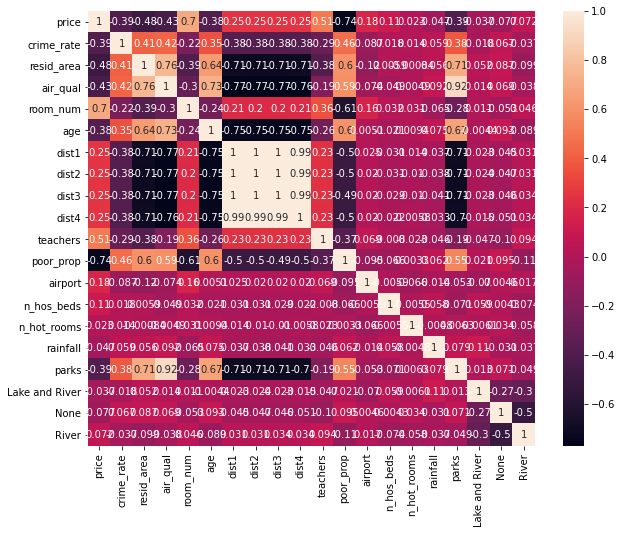

In [27]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

C:\Users\AMULYA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

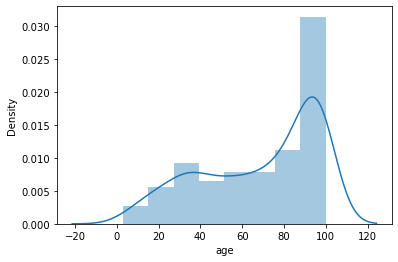

In [28]:
sns.distplot(data['age'])

C:\Users\AMULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airport', ylabel='count'>

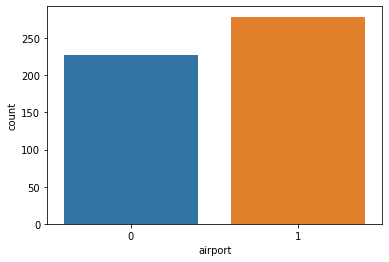

In [29]:
sns.countplot(data['airport'])

In [30]:
X=data.iloc[:,1:].values
Y=data.iloc[:,0].values

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [32]:
X_train

array([[5.51500e-02, 3.21800e+01, 4.72000e-01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.09600e-02, 3.22500e+01, 3.89000e-01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.59406e+01, 4.81000e+01, 6.79000e-01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [6.11540e-01, 3.39700e+01, 6.47000e-01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.11604e+01, 4.81000e+01, 7.40000e-01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.81213e+00, 4.81000e+01, 7.13000e-01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [33]:
# X_train.isnull().sum()

# REGRESSION

In [34]:
lg=LinearRegression()

In [35]:
lg.fit(X_train,Y_train)

LinearRegression()

In [36]:
lg.score(X_train,Y_train)

0.7190993702196692

In [37]:
predict1=lg.predict(X_test)

In [38]:
predict1

array([19.22638379, 17.12751885, 40.95992917, 35.93972443, 19.56525672,
       38.161395  , 19.6431622 , 30.0156406 , 34.93885393, 21.12677817,
       31.93912964, 28.80413335,  4.00185299, 25.78703727, 22.49926769,
       21.62572297, 19.12704153, 25.60859447, 17.74897263, 27.86242803,
       20.38882996, 29.80812942, 26.4104674 , 28.13405587, 19.17738204,
       31.66685269, 28.18137241, 25.48602606, 19.4351645 , 30.0415355 ,
       35.44236375, 21.79224793, 24.72414776, 24.02458085,  6.58263061,
        3.3855329 , 30.47066732, 17.67507228, 27.15996022, 24.29396236,
       26.18367936, 21.60539075, 37.88016206, 39.71629102,  4.68716898,
       23.13577841, 36.44598674, 21.43965372, 35.67585524, 21.98617058,
       25.4709831 , 33.55292605,  9.58424638, 28.44227731, 31.69790691,
       26.84575794, 17.87149823, 15.55398074, 10.55562549, 18.77352864,
       12.41603236, 39.76236256, 33.15059981, 18.3178475 , 21.28960003,
       22.56843083, 21.77514406, 31.91342197, 17.76793881, 21.38

In [39]:
mean_squared_error(predict1,Y_test)

26.62844668975215

In [40]:
rg=Ridge(alpha=0.1)

In [41]:
rg.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [42]:
rg.score(X_train,Y_train)

0.7185807179887831

In [43]:
predict2=rg.predict(X_test)

In [44]:
mean_squared_error(predict2,Y_test)

27.28497628759111

In [45]:
ls=Lasso(alpha=0.1)

In [46]:
ls.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [47]:
ls.score(X_train,Y_train)

0.7067542782454757

In [48]:
predict3=ls.predict(X_test)

In [49]:
mean_squared_error(predict3,Y_test)

25.0587901771385

In [50]:
rfr=RandomForestRegressor()

In [51]:
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [52]:
rfr.score(X_train,Y_train)

0.9815965482435441

In [53]:
predict4=rfr.predict(X_test)

In [54]:
mean_squared_error(predict4,Y_test)

15.706418852941177

# CLASSIFICATION

In [55]:
data2=pd.read_csv('C:\\Users\AMULYA\Desktop\customer_data.csv')

In [56]:
data2

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [57]:
data2.shape

(1125, 13)

In [58]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [59]:
data2.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [60]:
data2.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [61]:
data2.tail()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000
1124,0,54989781,4,1415.0,3,93000.0,2,8,5,113,4,151300,273.861279


In [62]:
data2.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [63]:
data2['fea_2'].value_counts()

1241.0    37
1214.0    27
1305.5    23
1223.0    21
1287.5    21
          ..
1481.0     1
1344.5     1
1130.0     1
1374.5     1
1403.0     1
Name: fea_2, Length: 158, dtype: int64

In [64]:
median=data2['fea_2'].median()

In [65]:
data2['fea_2']=data2['fea_2'].fillna(median)

In [66]:
data2['fea_2'].value_counts()

1281.5    159
1241.0     37
1214.0     27
1305.5     23
1287.5     21
         ... 
1481.0      1
1344.5      1
1130.0      1
1374.5      1
1403.0      1
Name: fea_2, Length: 158, dtype: int64

In [67]:
data2.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [68]:
data2.isna().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [69]:
data2

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,1281.5,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,1281.5,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [70]:
corr=data2.corr()

In [71]:
corr

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
label,1.000000e+00,-0.024619,0.052071,-0.073159,0.055658,-0.131459,0.017293,0.028907,-0.012271,-0.021251,5.590642e-17,0.000881,0.002444
id,-2.461878e-02,1.000000,-0.094888,0.034774,-0.011086,-0.015092,-0.046856,-0.066836,-0.027143,0.025433,-1.304576e-02,0.023954,0.029668
fea_1,5.207118e-02,-0.094888,1.000000,-0.010050,0.004391,-0.105110,-0.020977,0.346629,-0.030144,0.049951,-5.500809e-02,0.108505,0.095053
fea_2,-7.315867e-02,0.034774,-0.010050,1.000000,-0.241880,0.273440,0.003183,0.001870,0.004305,-0.022807,9.247938e-02,-0.027819,0.056126
fea_3,5.565787e-02,-0.011086,0.004391,-0.241880,1.000000,-0.119909,-0.017062,0.161899,0.253059,0.025249,1.285708e-01,-0.117266,0.066774
fea_4,-1.314593e-01,-0.015092,-0.105110,0.273440,-0.119909,1.000000,0.035862,-0.137654,-0.046294,-0.105451,1.000482e-01,0.066553,0.039042
fea_5,1.729286e-02,-0.046856,-0.020977,0.003183,-0.017062,0.035862,1.000000,0.055280,-0.017898,0.003813,-2.165627e-02,0.105127,-0.101328
fea_6,2.890698e-02,-0.066836,0.346629,0.001870,0.161899,-0.137654,0.055280,1.000000,-0.010971,0.028963,6.183006e-02,0.216362,0.128467
fea_7,-1.227143e-02,-0.027143,-0.030144,0.004305,0.253059,-0.046294,-0.017898,-0.010971,1.000000,0.078722,-1.652961e-02,-0.245453,0.021797
fea_8,-2.125122e-02,0.025433,0.049951,-0.022807,0.025249,-0.105451,0.003813,0.028963,0.078722,1.000000,-1.009981e-01,0.095880,0.133031


C:\Users\AMULYA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fea_2', ylabel='Density'>

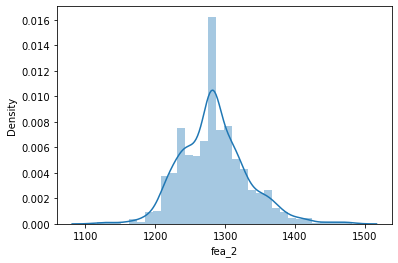

In [72]:
sns.distplot(data2['fea_2'])

C:\Users\AMULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

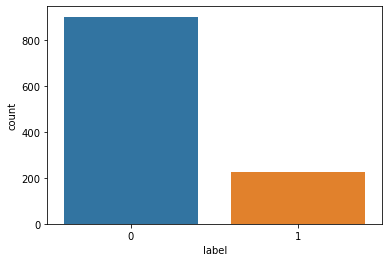

In [73]:
sns.countplot(data2['label'])

<AxesSubplot:>

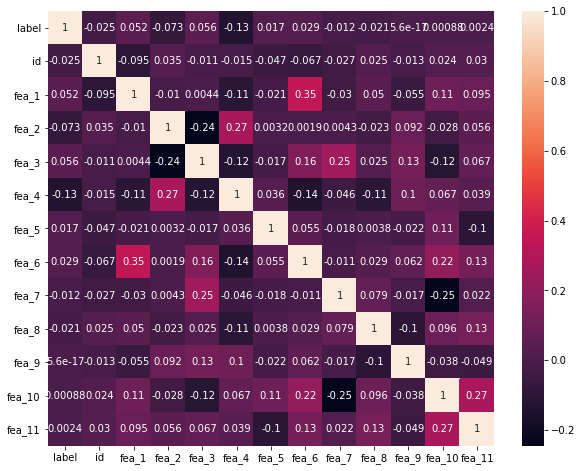

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [75]:
X=data2.drop(['label'],axis=1)
Y=data2['label']

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [77]:
lr=LogisticRegression()

In [78]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [79]:
lr.score(X_train,Y_train)

0.8

In [80]:
def classifier(alg,X_train,X_test,Y_train,Y_test):
    model=alg
    model.fit(X_train,Y_train)
    model.score(X_train,Y_train)
    predicted=model.predict(X_test)
    print(accuracy_score(predicted,Y_test))
    print(classification_report(predicted,Y_test))
    print(r2_score(predicted,Y_test))

In [81]:
classifier(LogisticRegression(),X_train,X_test,Y_train,Y_test)

0.8
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       225
           1       0.00      0.00      0.00         0

    accuracy                           0.80       225
   macro avg       0.50      0.40      0.44       225
weighted avg       1.00      0.80      0.89       225

0.0


C:\Users\AMULYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMULYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMULYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
classifier(RandomForestClassifier(),X_train,X_test,Y_train,Y_test)

0.7733333333333333
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       219
           1       0.00      0.00      0.00         6

    accuracy                           0.77       225
   macro avg       0.48      0.40      0.44       225
weighted avg       0.94      0.77      0.85       225

-7.732876712328766


In [85]:
classifier(DecisionTreeRegressor(),X_train,X_test,Y_train,Y_test)

0.6711111111111111
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       178
         1.0       0.20      0.19      0.20        47

    accuracy                           0.67       225
   macro avg       0.49      0.49      0.49       225
weighted avg       0.67      0.67      0.67       225

-0.9901984221850346


In [86]:
classifier(KNeighborsClassifier(),X_train,X_test,Y_train,Y_test)

0.7733333333333333
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       209
           1       0.11      0.31      0.16        16

    accuracy                           0.77       225
   macro avg       0.53      0.56      0.52       225
weighted avg       0.88      0.77      0.82       225

-2.4315191387559807
